In [72]:
import requests
import pandas as pd
import io
from pymatgen import Composition
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import statistics
import numpy as np
from statistics import mode 
from collections import Counter
import itertools

#Q1
url = 'https://raw.githubusercontent.com/materialsvirtuallab/nano281/master/labs/lab2/data.csv'
resp = requests.get(url)
orig_data = pd.read_csv(io.StringIO(resp.text), na_filter=False)

In [73]:
#1
orig_data.count()

task_id                      124515
formula                      124515
formation_energy_per_atom    124515
e_above_hull                 124515
band_gap                     124515
has_bandstructure            124515
dtype: int64

In [74]:
# Calculating the number of elements within each compound
count_els = []
for i in orig_data["formula"]:
    count_els.append(len(Composition(i).elements))


max_el = max(count_els)

x_vals = []
y_vals = []
for i in range(1, max_el+1):
    x_vals.append(i)
    y_vals.append(count_els.count(i))



In [75]:
#2
max_el

9

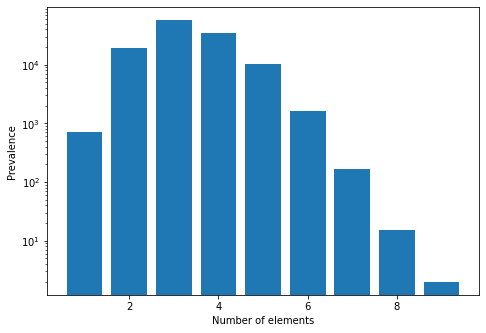

In [76]:
#3
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("Prevalence")
ax.set_xlabel("Number of elements")
ax.bar(x_vals,y_vals, log=True)
plt.show()

In [77]:
all_elements = []

for i in orig_data["formula"]:
    for k in Composition(i).elements:
        all_elements.append(k)
 

In [78]:
count_of_els = Counter(all_elements)

In [79]:
#4
#top 10 elements
first_ten = list(count_of_els)[:10]
#bottom 10 elements
last_ten = list(count_of_els)[(len(count_of_els)-10):len(count_of_els)]
print(first_ten)
print(last_ten)

[Element Cr, Element Ni, Element Tb, Element Hg, Element Mg, Element V, Element O, Element Pr, Element Sb, Element Pt]
[Element Tm, Element Be, Element Os, Element Pu, Element Pa, Element Xe, Element He, Element Kr, Element Ne, Element Ar]


In [80]:
#Q2
noble_gases = ["He", "Ne", "Ar", "Kr", "Xe", "Rn", "Og"]
data = []
contains_noble_gas = False

# moving noble gases to data list
for i in orig_data["formula"]:
    for k in noble_gases:
        if k in i:
            contains_noble_gas = True
    
    if contains_noble_gas == False:
        data.append(i)
    
    contains_noble_gas = False



In [81]:
#1
n = len(data)  # number of materials without noble gases (124515 with noble gases) 

In [82]:
# Reading in element properties dataset
elms_url = 'https://raw.githubusercontent.com/materialsvirtuallab/nano281/master/labs/lab2/element_properties.csv'
resp_elms = requests.get(elms_url)
element_data = pd.read_csv(io.StringIO(resp_elms.text), index_col=0)
print(element_data.head())

    AtomicRadius  AtomicVolume  AtomicWeight  BulkModulus  BoilingT  Column  \
H           0.25  18618.051941      1.007940          NaN     20.13     1.0   
He           NaN  37236.035563      4.002602          NaN      4.07    18.0   
Li          1.45     21.544058      6.941000         11.0   1615.00     1.0   
Be          1.05      8.098176      9.012182        130.0   2743.00     2.0   
B           0.85      7.297767     10.811000        320.0   4273.00    13.0   

    CovalentRadius    Density  ElectronAffinity  Electronegativity  \
H             31.0     0.0899              72.8               2.20   
He            28.0     0.1785               0.0                NaN   
Li           128.0   535.0000              59.6               0.98   
Be            96.0  1848.0000               0.0               1.57   
B             84.0  2460.0000              26.7               2.04   

    FirstIonizationEnergy  HeatCapacityMass  Row   phi  \
H               13.598443            14.304  1

In [83]:
#2
# Num. of NaN values for each column 
element_data.isnull().sum(axis=0)

AtomicRadius               7
AtomicVolume               2
AtomicWeight               0
BulkModulus               26
BoilingT                   2
Column                     0
CovalentRadius             0
Density                    2
ElectronAffinity           9
Electronegativity          4
FirstIonizationEnergy      1
HeatCapacityMass          10
Row                        0
phi                       22
SecondIonizationEnergy    12
ShearModulus              34
dtype: int64

In [84]:
#3
element_data = element_data.fillna(element_data.mean()) # replace NaN values w/ mean

In [85]:
for i in element_data:
    print(i)

AtomicRadius
AtomicVolume
AtomicWeight
BulkModulus
BoilingT
Column
CovalentRadius
Density
ElectronAffinity
Electronegativity
FirstIonizationEnergy
HeatCapacityMass
Row
phi
SecondIonizationEnergy
ShearModulus


In [86]:
#4 and 5
temp_amounts = []

average_properties = []
average_chunks = []
counter = 0
n_temp = []
ele = 0
total = 0
for i in orig_data["formula"]:
    total = 0
    temp_amounts = []
    n_temp = []
    chunks = []
    for k in Composition(i).elements:
        temp_amounts.append(int(Composition(i)[str(k)])) #number of molecules per element
        
        n_temp.append(element_data.at[str(k), 'AtomicRadius']*Composition(i)[str(k)]) #multiplying number of molecules by atomic radius of elem.
        n_temp.append(element_data.at[str(k), 'AtomicVolume']*Composition(i)[str(k)])
        n_temp.append(element_data.at[str(k), 'AtomicWeight']*Composition(i)[str(k)])
        n_temp.append(element_data.at[str(k), 'BulkModulus']*Composition(i)[str(k)])
        n_temp.append(element_data.at[str(k), 'BoilingT']*Composition(i)[str(k)])
        n_temp.append(element_data.at[str(k), 'Column']*Composition(i)[str(k)])
        n_temp.append(element_data.at[str(k), 'CovalentRadius']*Composition(i)[str(k)])
        n_temp.append(element_data.at[str(k), 'Density']*Composition(i)[str(k)])
        n_temp.append(element_data.at[str(k), 'ElectronAffinity']*Composition(i)[str(k)])
        n_temp.append(element_data.at[str(k), 'Electronegativity']*Composition(i)[str(k)])
        n_temp.append(element_data.at[str(k), 'FirstIonizationEnergy']*Composition(i)[str(k)])
        n_temp.append(element_data.at[str(k), 'HeatCapacityMass']*Composition(i)[str(k)])
        n_temp.append(element_data.at[str(k), 'Row']*Composition(i)[str(k)])
        n_temp.append(element_data.at[str(k), 'phi']*Composition(i)[str(k)])
        n_temp.append(element_data.at[str(k), 'SecondIonizationEnergy']*Composition(i)[str(k)])
        n_temp.append(element_data.at[str(k), 'ShearModulus']*Composition(i)[str(k)])
         
        
    counter += 1
    
    # Chunking one dimensional array into x16, each representing one material
    chunks = np.array([n_temp[x:x+16] for x in range(0, len(n_temp), 16)])
    # Add the values into a compisite array of size 16 by adding elements of the same index within the chunks
    # For instance chunks[0][0]+chunks[1][0] = chunks[0] and so on
    n_sums = (np.sum(chunks, 0)).tolist()
    
    for element in temp_amounts:
        total+=element
    
    # Solving for averages by dividing the multiplied sums by the number of molecules
    for number in n_sums:
        average_properties.append(number / total)

    
    if counter == len(orig_data):
        break
   
 

In [87]:
average_properties = np.array(average_properties).reshape(124515,16)

In [88]:
average_properties.shape

(124515, 16)

In [ ]:
#6
max_properties = []
min_properties = []
n_temp_2 = []
max_temp = []
min_temp = []

counter = 0

for i in orig_data["formula"]:
    n_temp_2 = []
    m_chunks = []
    max_temp = []
    min_temp = []

    for k in Composition(i).elements:
        temp_amounts.append(int(Composition(i)[str(k)])) #number of molecules per element
        
        n_temp_2.append(element_data.at[str(k), 'AtomicRadius']) #multiplying number of molecules by atomic radius of elem.
        n_temp_2.append(element_data.at[str(k), 'AtomicVolume'])
        n_temp_2.append(element_data.at[str(k), 'AtomicWeight'])
        n_temp_2.append(element_data.at[str(k), 'BulkModulus'])
        n_temp_2.append(element_data.at[str(k), 'BoilingT'])
        n_temp_2.append(element_data.at[str(k), 'Column'])
        n_temp_2.append(element_data.at[str(k), 'CovalentRadius'])
        n_temp_2.append(element_data.at[str(k), 'Density'])
        n_temp_2.append(element_data.at[str(k), 'ElectronAffinity'])
        n_temp_2.append(element_data.at[str(k), 'Electronegativity'])
        n_temp_2.append(element_data.at[str(k), 'FirstIonizationEnergy'])
        n_temp_2.append(element_data.at[str(k), 'HeatCapacityMass'])
        n_temp_2.append(element_data.at[str(k), 'Row'])
        n_temp_2.append(element_data.at[str(k), 'phi'])
        n_temp_2.append(element_data.at[str(k), 'SecondIonizationEnergy'])
        n_temp_2.append(element_data.at[str(k), 'ShearModulus'])
        
         
        
    counter += 1
    
    # Chunking one dimensional array into x16, each representing one material
    m_chunks = np.array([n_temp_2[x:x+16] for x in range(0, len(n_temp_2), 16)])
    
    # Compressing chunks into 1 list that encompasses max values from all chunks
    # For instance, if m_chunks[0][0] = 3 and m_chunks[1][0] = 4, then max_temp[0] = 4
    max_temp.append(list(map(max, zip(m_chunks[0], *m_chunks))))
    max_properties.append(max_temp) 
    
    # Works same as above code but for min vals
    min_temp.append(list(map(min, zip(m_chunks[0], *m_chunks))))
    min_properties.append(min_temp)
    
    if counter == len(orig_data):
        break
   


In [ ]:
max_properties = np.array(max_properties).reshape(124515,16)

In [ ]:
min_properties = np.array(min_properties).reshape(124515,16)

In [ ]:
# Creating the 124515x48 shape
design_matrix = np.concatenate([max_properties,min_properties,average_properties]).reshape(124515, 48)
print(design_matrix.shape)

In [ ]:
#Q3

#1
targets = orig_data[['formation_energy_per_atom', 'e_above_hull', 'band_gap']].copy()

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting data into 90% training and 10% testing
train_x, test_x, train_y, test_y = train_test_split(design_matrix, targets, test_size=0.10, random_state=42)

In [ ]:
#2

# Normalize function on mean and std.
norm_train_x = (train_x - train_x.mean(axis=0)) / train_x.std(axis=0)
norm_test_x = (test_x - test_x.mean(axis=0)) / test_x.std(axis=0)

In [ ]:
#3
from sklearn.linear_model import LinearRegression

# Feature set
X = norm_train_x  
# Label
y = train_y["formation_energy_per_atom"]  
model = LinearRegression()
model.fit(X, y)

X_predict = norm_test_x 
y_predict_linear_reg = model.predict(X_predict)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

#Linear Regression

mae_linear_reg = mean_absolute_error(test_y["formation_energy_per_atom"], y_predict_linear_reg)
rmse_linear_reg = sqrt(mean_squared_error(test_y["formation_energy_per_atom"], y_predict_linear_reg))

In [ ]:
#4
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#Ridge 
ridge = Ridge(alpha=0.1)
ridge.fit(X, y)

y_predic_ridge = ridge.predict(X_predict)
mae_ridge = mean_absolute_error(test_y["formation_energy_per_atom"], y_predic_ridge)
rmse_ridge = sqrt(mean_squared_error(test_y["formation_energy_per_atom"], y_predic_ridge))

In [ ]:
print(mae_ridge)
print(rmse_ridge)

In [ ]:
#Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

y_predic_lasso = lasso.predict(X_predict)
mae_lasso = mean_absolute_error(test_y["formation_energy_per_atom"], y_predic_lasso)
rmse_lasso = sqrt(mean_squared_error(test_y["formation_energy_per_atom"], y_predic_lasso))

In [ ]:
print(mae_lasso)
print(rmse_lasso)

In [ ]:
#5 It is difficult to use compositions to predict material proeprties as some of the element data does not exactly correlate to the values within what we are predicting for.

In [ ]:
#Q4
img = mpimg.imread('catalyst.png') #numpy array 
imgplot = plt.imshow(img)

In [4]:
#1
img.shape

(200, 200)

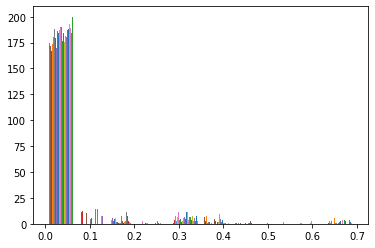

In [5]:
#values are between 0 and 1
#2
mu, sigma = 200, 25
x = mu + sigma*np.random.randn(10000)
n, bins, patches = plt.hist(img)
plt.show()

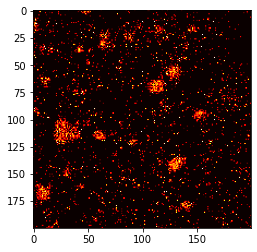

In [6]:
#hot map
lum_img = img[:, :]
plt.imshow(lum_img, cmap="hot")

In [7]:
image = np.array(lum_img) #, dtype=np.float64)/ 255
h, w = image.shape
image_array = np.reshape(image, (h*w))

[0.         0.06980392 0.13960785 0.20941177 0.2792157  0.34901962
 0.41882354 0.48862746 0.5584314  0.62823534]
[36623   639   626    89  1028   358   181    16    48   392]


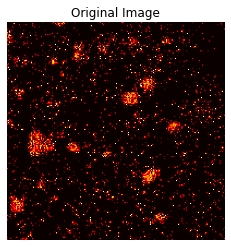

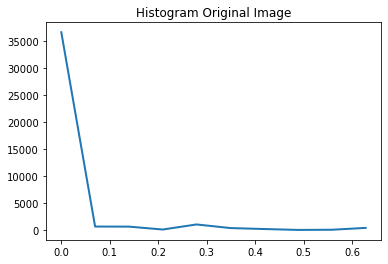

In [8]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original Image")
plt.imshow(image, cmap="hot")

plt.figure(2)
plt.clf()
plt.title("Histogram Original Image")
#hist = np.histogram(lum_img, bins=np.arange(0, 256))
hist = np.histogram(lum_img)
print(hist[1][:-1])
print(hist[0])
plt.plot(hist[1][:-1], hist[0], lw=2)

In [9]:
from sklearn.utils import shuffle
from sklearn.cluster import KMeans


image_array_sample = np.array(shuffle(image_array, random_state=0)[:40000])
#print(image_array_sample)
kmeans = KMeans(n_clusters=5).fit(image_array_sample.reshape(-1,1))
labels = kmeans.predict(image_array.reshape(-1,1))

#create the quantized image
image_out = np.zeros((h, w))
label_idx = 0




[0.]
[36667     0  1221     0  1117   553     0     0     0   442]


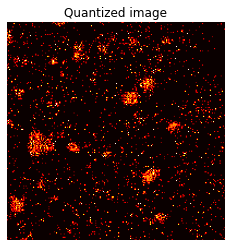

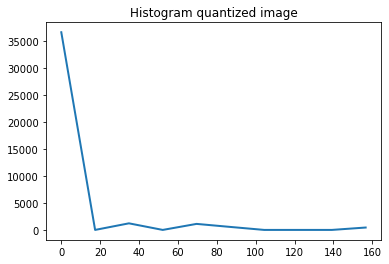

In [10]:
for i in range(h):
    for j in range(w):
        if label_idx < h*w:
            image_out[i][j] = (kmeans.cluster_centers_[labels[label_idx]])
            label_idx += 1
    #if label_idx == h*w:
    #    label_idx = 1

# Quantized image
plt.figure(3)
plt.clf()
plt.axis("off")
plt.title("Quantized image")
plt.imshow(image_out, cmap="hot")

#Convert quantized image for plotting
image_out = np.array(image_out* 255, dtype=np.uint8)

#Histogram quantized image
plt.figure(4)
plt.clf
plt.title("Histogram quantized image")
#hist = np.histogram(image_out, bins=np.arange(0,256))
hist = np.histogram(image_out)
print(hist[1][:1])
print(hist[0])
plt.plot(hist[1][:-1], hist[0], lw=2)

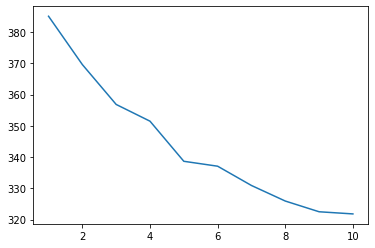

In [11]:
# Finding ideal value for n_clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter=500)
    kmeans.fit(np.array(lum_img))
    wcss.append(kmeans.inertia_)    
    
plt.plot(range(1,11), wcss)
plt.show()

#6 or 7 clusters seem to be most efficient as there appears to be an elbow

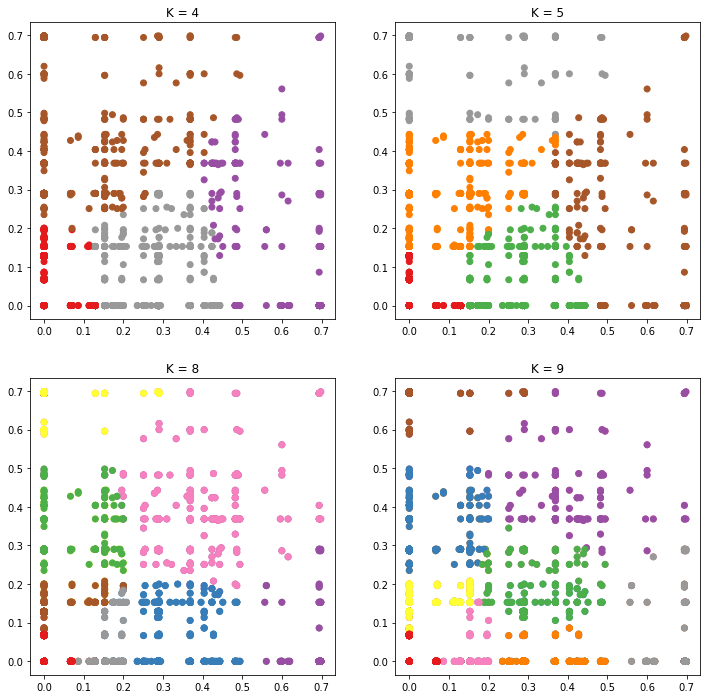

In [68]:
data = np.array(lum_img).reshape(-1,2)

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for i, k in enumerate(range(4, 10)):
    clustering = KMeans(k).fit(data)
    a = ax[0 if i < 2 else 1, i % 2]
    a.scatter(data[:, 0], data[:, 1], c=clustering.labels_, cmap='Set1')
    a.set_title("K = %d" % k)

In [69]:
#kmeans
from sklearn.cluster import DBSCAN

kmeans2 = KMeans(n_clusters=6, max_iter=500)
kmeans2.fit(np.array(lum_img))
y_kmeans = kmeans.predict(np.array(lum_img))
#print(len(k_means_points))

#plt.scatter(np.array(lum_img)[:, 0], np.array(lum_img)[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans2.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [70]:
stds = np.std(data, axis=0)
print(len(stds))

centers = centers.reshape(-1, 2)
print(len(centers))
labels = []

for i, (c, std) in enumerate(zip(centers[:5], stds)):
    points = data[:50] * std + c
    labels.extend([i] * 100)
    data = np.append(data, points, 0)
    
noise = np.random.rand(30, 2) * 0.7
data = np.append(data, noise, 0)
data = np.array(data)
print(len(data))

2
600
20130


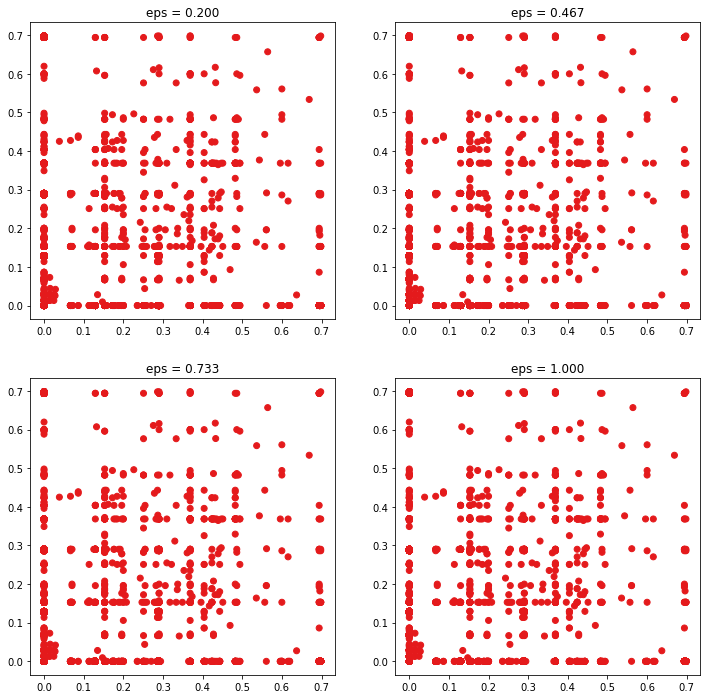

In [71]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for i, eps in enumerate(np.linspace(0.2, 1, 4)):
    clustering = DBSCAN(eps=eps).fit(data)
    a = ax[0 if i < 2 else 1, i % 2]
    
    a.scatter(data[:, 0], data[:, 1], c=clustering.labels_, cmap='Set1')
    a.set_title("eps = %.3f" % eps)